In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("butterflies.csv")
df = df[df["data set"] == "train"]
df = df[df.columns[0:2]]
df

,filepaths,labels
0,train/ADONIS/01.jpg,ADONIS
1,train/ADONIS/02.jpg,ADONIS
2,train/ADONIS/03.jpg,ADONIS
3,train/ADONIS/04.jpg,ADONIS
4,train/ADONIS/05.jpg,ADONIS
...,...,...
9280,train/ZEBRA LONG WING/104.jpg,ZEBRA LONG WING
9281,train/ZEBRA LONG WING/105.jpg,ZEBRA LONG WING
9282,train/ZEBRA LONG WING/106.jpg,ZEBRA LONG WING
9283,train/ZEBRA LONG WING/107.jpg,ZEBRA LONG WING


In [2]:
labels = pd.read_csv("class_dict.csv")
labels = pd.DataFrame(labels[["class","class_index"]])
labels

,class,class_index
0,ADONIS,0
1,AFRICAN GIANT SWALLOWTAIL,1
2,AMERICAN SNOOT,2
3,AN 88,3
4,APPOLLO,4
...,...,...
70,ULYSES,70
71,VICEROY,71
72,WOOD SATYR,72
73,YELLOW SWALLOW TAIL,73


In [3]:
df =pd.merge(df, labels, left_on = "labels", right_on = "class",how='outer')
df

,filepaths,labels,class,class_index
0,train/ADONIS/01.jpg,ADONIS,ADONIS,0
1,train/ADONIS/02.jpg,ADONIS,ADONIS,0
2,train/ADONIS/03.jpg,ADONIS,ADONIS,0
3,train/ADONIS/04.jpg,ADONIS,ADONIS,0
4,train/ADONIS/05.jpg,ADONIS,ADONIS,0
...,...,...,...,...
9280,train/ZEBRA LONG WING/104.jpg,ZEBRA LONG WING,ZEBRA LONG WING,74
9281,train/ZEBRA LONG WING/105.jpg,ZEBRA LONG WING,ZEBRA LONG WING,74
9282,train/ZEBRA LONG WING/106.jpg,ZEBRA LONG WING,ZEBRA LONG WING,74
9283,train/ZEBRA LONG WING/107.jpg,ZEBRA LONG WING,ZEBRA LONG WING,74


In [4]:
hhh = df.drop('class', axis=1)
hhh

,filepaths,labels,class_index
0,train/ADONIS/01.jpg,ADONIS,0
1,train/ADONIS/02.jpg,ADONIS,0
2,train/ADONIS/03.jpg,ADONIS,0
3,train/ADONIS/04.jpg,ADONIS,0
4,train/ADONIS/05.jpg,ADONIS,0
...,...,...,...
9280,train/ZEBRA LONG WING/104.jpg,ZEBRA LONG WING,74
9281,train/ZEBRA LONG WING/105.jpg,ZEBRA LONG WING,74
9282,train/ZEBRA LONG WING/106.jpg,ZEBRA LONG WING,74
9283,train/ZEBRA LONG WING/107.jpg,ZEBRA LONG WING,74


In [5]:
butterfly = []
for i in hhh["filepaths"]: 
    image = Image.open(i)
    butterfly.append(np.array(image))

butterfly = np.array(butterfly)

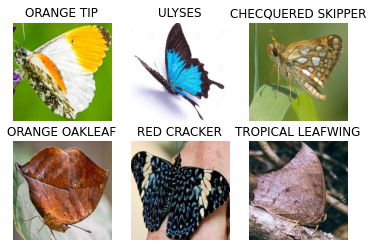

In [8]:
fig, ax = plt.subplots(2,3)
im = list(np.random.randint(0,9000,6))
a = 0
for i in range(2):
    for j in range(3):
        ax[i,j].imshow(butterfly[im[a],:,:,:])
        ax[i,j].axis("off")
        ax[i,j].set(title = hhh["labels"][im[a]])
        a += 1

In [11]:
butterfly.shape

(9285, 224, 224, 3)

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
conv = layers.Conv2D(32, (6, 6), 
                     activation='relu', 
                     input_shape=(224, 224, 3),
                     dtype = "float64")

In [13]:
color_im = butterfly[999:1000]
color_im = np.array(color_im, dtype = "float64")
# perform convolution and extract as numpy array
# Now our image after convolution has 32 features, because in last step we define our output as 32.
convd = conv(color_im).numpy()

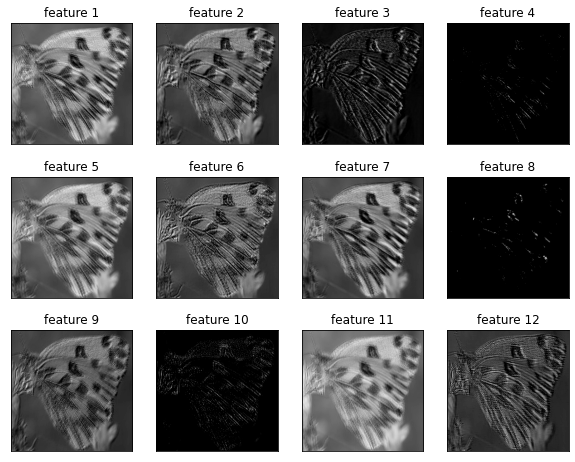

In [15]:
# get a single feature (corresponding to one choice of convolution)
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    feature = convd[0,:,:,i]
    plt.imshow(feature, cmap = "gray")
    plt.title("feature "+str(i+1))

In [16]:
model = models.Sequential([
    layers.Conv2D(32, (6, 6), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((6, 6)),
    layers.Conv2D(32, (6, 6), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (6, 6), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(set(hhh["labels"]))) # number of classes
])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(butterfly, 
                    hhh["class_index"], 
                    epochs=20, 
                    steps_per_epoch = 100)

Epoch 1/20
100/100 [==============================] - 124s 1s/step - loss: 1.1424 - accuracy: 0.6809
Epoch 2/20
100/100 [==============================] - 123s 1s/step - loss: 0.7850 - accuracy: 0.7724
Epoch 3/20
100/100 [==============================] - 123s 1s/step - loss: 0.6393 - accuracy: 0.8121
Epoch 4/20
100/100 [==============================] - 123s 1s/step - loss: 0.4769 - accuracy: 0.8556
Epoch 5/20
100/100 [==============================] - 123s 1s/step - loss: 0.4152 - accuracy: 0.8737
Epoch 6/20
100/100 [==============================] - 123s 1s/step - loss: 0.3689 - accuracy: 0.8894
Epoch 7/20
100/100 [==============================] - 124s 1s/step - loss: 0.3555 - accuracy: 0.8932
Epoch 8/20
100/100 [==============================] - 123s 1s/step - loss: 0.3063 - accuracy: 0.9054
Epoch 9/20
100/100 [==============================] - 123s 1s/step - loss: 0.2207 - accuracy: 0.9325
Epoch 10/20
100/100 [==============================] - 123s 1s/step - loss: 0.2268 - accura

In [39]:
y_pred = model.predict(butterfly)
labels_pred = y_pred.argmax(axis = 1)
labels_pred

array([ 0,  0,  0, ..., 74, 74, 74], dtype=int64)

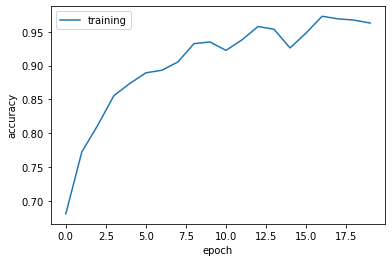

In [40]:
plt.plot(history.history["accuracy"], label = "training")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

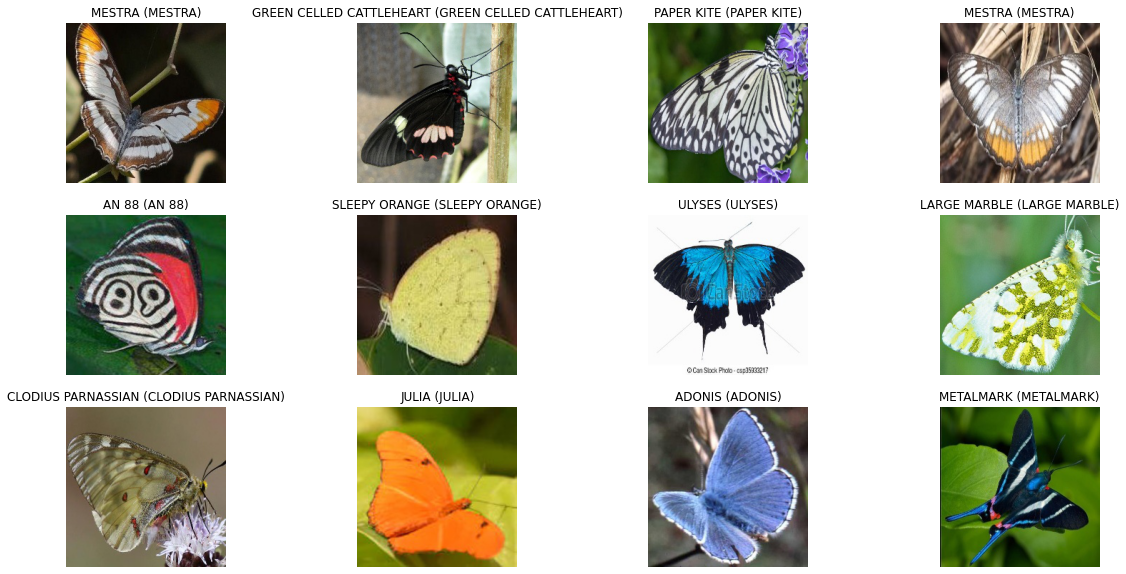

In [43]:
fig, ax = plt.subplots(3,4, figsize = (20,10))
im = list(np.random.randint(0,9000,12))
a = 0
for i in range(3):
    for j in range(4):
        ax[i,j].imshow(butterfly[im[a],:,:,:])
        ax[i,j].axis("off")
        ax[i,j].set(title = str(hhh["labels"][im[a]]) + " ("+ str(labels["class"][labels_pred[im[a]]]) + ")")
        a += 1